Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

# 0. Применение полиномиальной регрессии для предсказания непрерывного параметра

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке <code>Species</code>. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [ ]:
data = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/fed9823d73d2b53f5591d98b87c20b8a/asset-v1:ITMO+bonus_track_methods+2023+type@asset+block/fish_train.csv')
data.head(10)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
5,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390
6,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
7,Bream,700.0,30.4,33.0,38.5,14.9380,5.1975
8,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
9,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200


In [ ]:
data.shape

(119, 7)

In [ ]:
data.isna().sum() # проверим наши данные на наличие пропусков

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
unique_observations = data["Species"].unique()
unique_observations

array(['Roach', 'Perch', 'Bream', 'Whitefish', 'Smelt', 'Parkki', 'Pike'],
      dtype=object)

In [ ]:
data.dtypes ##все данные, не считая стобцы с видами, являются числами с плавающей точкой. В дальнейшем нам придется отбросить этот нечисловой параметр

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [ ]:
counts = data['Species'].value_counts()
counts

Perch        42
Bream        26
Roach        15
Pike         13
Smelt        10
Parkki        8
Whitefish     5
Name: Species, dtype: int64

In [ ]:
# < ENTER YOUR CODE HERE >
# Разделение данных на обучающую и тестовую выборки
X = data.drop("Weight", axis=1)  # Предикторы
y = data["Weight"]  # Отклик
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify=data['Species'])

In [ ]:
train_counts = X_train['Species'].value_counts()
train_counts

Perch        34
Bream        21
Roach        12
Pike         10
Smelt         8
Parkki        6
Whitefish     4
Name: Species, dtype: int64

Вычислите выборочное среднее колонки <code>Width</code> полученной тренировочной выборки.

In [ ]:
# < ENTER YOUR CODE HERE >
mean_width = np.mean(data['Width'])
mean_width

4.507406722689075

In [ ]:
mean_width = np.mean(X_train['Width']) #среднее тренировочной выборки
mean_width ** 3

94.93384014438206

In [ ]:
X_train

,Species,Length1,Length2,Length3,Height,Width
99,Pike,30.0,32.3,34.8,5.5680,3.3756
112,Perch,34.6,37.0,39.3,10.5717,6.3666
109,Perch,22.6,24.6,26.2,6.7334,4.1658
2,Bream,26.5,29.0,34.0,12.4440,5.1340
8,Whitefish,24.1,26.5,29.3,8.1454,4.2485
...,...,...,...,...,...,...
113,Perch,36.9,40.0,42.3,11.9286,7.1064
37,Perch,40.2,43.5,46.0,12.6040,8.1420
10,Perch,19.0,21.0,22.5,5.9175,3.3075
106,Smelt,11.7,12.4,13.5,2.4300,1.2690


In [ ]:
mean_width = np.mean(X_test['Width']) #среднее тестовой выборки
mean_width

4.291929166666667

# 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

In [ ]:
# # < ENTER YOUR CODE HERE >
# # One-hot кодирование столбца 'Species' с помощью get_dummies()
# X_train_encoded = pd.get_dummies(X_train['Species'])
# X_test_encoded = pd.get_dummies(X_test['Species'])

# # Удаление столбца 'Species' из X_train и X_test
# X_train = X_train.drop('Species', axis=1)
# X_test = X_test.drop('Species', axis=1)

# # Объединение one-hot кодированных данных с исходными данными
# X_train = pd.concat([X_train, X_train_encoded], axis=1)
# X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [ ]:
X_train.drop(['Species'], axis=1, inplace=True)
X_test.drop(['Species'], axis=1, inplace=True)
X_train

,Length1,Length2,Length3,Height,Width
99,30.0,32.3,34.8,5.5680,3.3756
112,34.6,37.0,39.3,10.5717,6.3666
109,22.6,24.6,26.2,6.7334,4.1658
2,26.5,29.0,34.0,12.4440,5.1340
8,24.1,26.5,29.3,8.1454,4.2485
...,...,...,...,...,...
113,36.9,40.0,42.3,11.9286,7.1064
37,40.2,43.5,46.0,12.6040,8.1420
10,19.0,21.0,22.5,5.9175,3.3075
106,11.7,12.4,13.5,2.4300,1.2690


In [ ]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Выполнение предсказаний для тестового набора данных
y_pred = model.predict(X_test)

# Оценка модели при помощи метрики r2_score()
r2 = r2_score(y_test, y_pred)
r2.round(3)

0.842

In [ ]:
#оценочка и предсказание в одном флаконе

r2_score(y_test, model.predict(X_test))

0.8417293614893447

# 2. Добавление предварительной обработки признаков.

## Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

<Axes: >

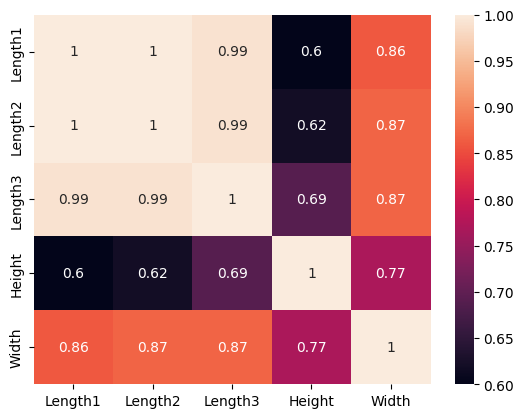

In [ ]:
# < ENTER YOUR CODE HERE >

corr_matrix = X_train.corr().round(2)
#corr_matrix
# матрицf корреляций признаков
sns.heatmap(corr_matrix, annot=True)

In [ ]:
# Определите тройку наиболее коррелированных между собой признаков
most_correlated_features = corr_matrix.abs().unstack().sort_values(ascending=False)
top_three_correlated_features = most_correlated_features.iloc[:3]
top_three_correlated_features
###если честно, не очень понятно, как аппаратными методами это лучше делать, поэтому буду считать, что наиболее коррелированные между собой признаки - 3 длины

Length1  Length1    1.0
Length2  Length1    1.0
Height   Height     1.0
dtype: float64

Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент.

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков.

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты.

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [ ]:

# < ENTER YOUR CODE HERE >



In [ ]:
# Шаг 1: Примените метод главных компонент

features = ['Length1', 'Length2', 'Length3']
X_1 = X_train[features]

pca = PCA(n_components=3, svd_solver='full')
X_pca = pca.fit_transform(X_1)

# Шаг 2: Вычислите долю объясненной дисперсии для первой главной компоненты
explained_variance_ratio = pca.explained_variance_ratio_
fraction_variance = explained_variance_ratio[0].round(3)
print(fraction_variance)
# Шаг 3: Замените три коррелированных признака на новый признак Lengths
X_train['Lengths'] = X_pca[:, 0]
X_train = X_train.drop(features, axis=1)


0.996


In [ ]:
X_train

,Height,Width,Lengths
99,5.5680,3.3756,5.305980
112,10.5717,6.3666,13.255416
109,6.7334,4.1658,-8.403711
2,12.4440,5.1340,1.038694
8,8.1454,4.2485,-4.590682
...,...,...,...
113,11.9286,7.1064,18.067860
37,12.6040,8.1420,24.136189
10,5.9175,3.3075,-14.690194
106,2.4300,1.2690,-29.111521


Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [ ]:
# < ENTER YOUR CODE HERE >


In [ ]:
# Шаг 4: Примените преобразование к тестовому набору данных
# Предположим, что df_test - ваш DataFrame с тестовыми данными
X_2 = X_test[features]
X_test_pca = pca.transform(X_2)
X_test['Lengths'] = X_test_pca[:, 0]
X_test = X_test.drop(features, axis=1)

In [ ]:
X_test

,Height,Width,Lengths
30,14.4738,5.7276,8.943170
92,16.2405,5.5890,11.401033
60,7.7860,5.1296,23.671294
105,2.1120,1.4080,-36.567683
78,7.7920,4.8700,28.850215
76,6.3960,3.9770,15.919141
63,5.6925,3.6675,-14.690194
91,5.2224,3.3216,-19.955816
118,12.4313,7.3514,16.713557
16,1.7388,1.0476,-33.561857


Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

In [ ]:
# < ENTER YOUR CODE HERE >
# Шаг 5: Обучите модель линейной регрессии и оцените r2_score


In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred).round(3)
print("R2 Score:", r2)

R2 Score: 0.843


Видно, что точность значительно не изменилась.

## Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи <code>sns.pairplot()</code>.

In [ ]:
# < ENTER YOUR CODE HERE >


Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

In [ ]:
# < ENTER YOUR CODE HERE >
# Возведите значения признаков в куб
# Возведем значения признаков в куб
train_data_cubed = np.power(X_train, 3)
test_data_cubed = np.power(X_test, 3)


In [ ]:
train_data_cubed

,Height,Width,Lengths
99,172.622610,38.463866,149.381474
112,1181.502082,258.061189,2329.056695
109,305.283438,72.292833,-593.489794
2,1926.992424,135.321746,1.120631
8,540.427262,76.684372,-96.745670
...,...,...,...
113,1697.338363,358.879745,5898.209150
37,2002.281725,539.750799,14060.672737
10,207.211951,36.182582,-3170.170276
106,14.348907,2.043548,-24671.450357


Введите выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [ ]:
# < ENTER YOUR CODE HERE >
mean_width = train_data_cubed['Width'].mean()
mean_width

131.27449030707905

Выберите изображения, соответствующие зависимости <code>Weight</code> от <code>Width</code> до преобразования и после.

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи `r2_score()`.

In [ ]:
# < ENTER YOUR CODE HERE >
# Обучим модель линейной регрессии на тренировочных данных
model2 = LinearRegression()
model2.fit(train_data_cubed, y_train)

# Выполним предсказания для тестовых данных
predictions = model2.predict(test_data_cubed)

In [ ]:
r2_score_value = r2_score(y_test, predictions)
r2_score_value.round(3)

0.929

Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

## Добавление категориальных признаков

Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

<b>Примечание</b>: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака <code>Species</code> присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, [например, здесь](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [ ]:
# Разделение данных на обучающую и тестовую выборки для восстановления
X_last = data.drop("Weight", axis=1)  # Предикторы
y_last = data["Weight"]  # Отклик
X_train_last, X_test_last, y_train_last, y_test_last = train_test_split(X_last, y_last, test_size=0.2, random_state=35, stratify=data['Species'])

In [ ]:
#вернем к тренировочным и тестовым данным колонку Species
#тренировочные
added_feature = ['Species']
species = X_train_last[added_feature]
train_data_cubed = pd.concat([train_data_cubed, species], axis=1)
#тестовые
species = X_test_last[added_feature]
test_data_cubed = pd.concat([test_data_cubed, species], axis=1)

In [ ]:
# # < ENTER YOUR CODE HERE >
#One-hot кодирование столбца 'Species' с помощью get_dummies()
X_train_encoded = pd.get_dummies(train_data_cubed['Species'])
X_test_encoded = pd.get_dummies(test_data_cubed['Species'])

#Удаление столбца 'Species' из X_train и X_test
train_data_cubed = train_data_cubed.drop('Species', axis=1)
test_data_cubed = test_data_cubed.drop('Species', axis=1)

# Объединение one-hot кодированных данных с исходными данными
X_train = pd.concat([train_data_cubed, X_train_encoded], axis=1)
X_test = pd.concat([test_data_cubed, X_test_encoded], axis=1)

In [ ]:
#выполним предсказания

model3 = LinearRegression()
model3.fit(X_train, y_train)

predictions = model3.predict(X_test)

In [ ]:
r2_score_value = r2_score(y_test, predictions)
r2_score_value.round(3)

0.933

И снова точность возрасла.

Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

In [ ]:
#вернем к тренировочным и тестовым данным колонку Species
#тренировочные
added_feature = ['Species']
species = X_train_last[added_feature]
train_data_cubed = pd.concat([train_data_cubed, species], axis=1)
#тестовые
species = X_test_last[added_feature]
test_data_cubed = pd.concat([test_data_cubed, species], axis=1)

In [ ]:
# < ENTER YOUR CODE HERE >
#One-hot кодирование столбца 'Species' с помощью get_dummies()
X_train_encoded = pd.get_dummies(train_data_cubed['Species'], drop_first=True)
X_test_encoded = pd.get_dummies(test_data_cubed['Species'], drop_first=True)

#Удаление столбца 'Species' из X_train и X_test
train_data_cubed = train_data_cubed.drop('Species', axis=1)
test_data_cubed = test_data_cubed.drop('Species', axis=1)

# Объединение one-hot кодированных данных с исходными данными
X_train = pd.concat([train_data_cubed, X_train_encoded], axis=1)
X_test = pd.concat([test_data_cubed, X_test_encoded], axis=1)


In [ ]:
#выполним предсказания

model4 = LinearRegression()
model4.fit(X_train, y_train)

predictions = model4.predict(X_test)

In [ ]:
r2_score_value = r2_score(y_test, predictions)
r2_score_value.round(3)

0.933

На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.